In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from google.colab.patches import cv2_imshow  # For displaying images in Google Colab

In [ ]:

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import csv

In [ ]:

# Replace the path with the actual path to your file in Google Drive
file_path = '/content/drive/MyDrive/DEAP/df_combine.csv'

df_combine = pd.read_csv(file_path)

# **ML Models**

## **Label: Valence**

In [ ]:
labels = df_combine['Valence_label'].values #change labels here
# Print the labels to verify
print(len(labels))

44090


Load Features

In [ ]:
def load_features_from_csv(file_path):
    X = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            # Convert the row to a list of floats
            features = list(map(float, row[:]))
            X.append(features)
    X = np.array(X)
    return X

file_path = '/content/drive/MyDrive/DEAP/savedfeatures.csv'  # Replace with your file path
X = load_features_from_csv(file_path)
y=labels
print("Features shape:", X.shape)
print("Labels shape:", y.shape)
'''
X = []
y = []

for frame_idx, frame_file in enumerate(frame_files):
    frame = cv2.imread(frame_file)
    sift_features = extract_sift_features(frame)
    if sift_features is not None:
        # Aggregate features by taking the mean (alternative aggregation methods can be used)
        aggregated_features = np.mean(sift_features, axis=0)
        X.append(aggregated_features)
        y.append(labels_s1[frame_idx % len(labels_s1)])
'''

X = np.array(X)
y = np.array(y)
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Ensure labels are single-class and categorical
# If they are in numeric format, this will work directly; otherwise, encode them
# For binary classification, make sure labels are 0 and 1.

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Features shape: (44090, 128)
Labels shape: (44090,)
Features shape: (44090, 128)
Labels shape: (44090,)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:25:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7350873213880699
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.55      0.62      3389
         1.0       0.75      0.85      0.80      5429

    accuracy                           0.74      8818
   macro avg       0.72      0.70      0.71      8818
weighted avg       0.73      0.74      0.73      8818



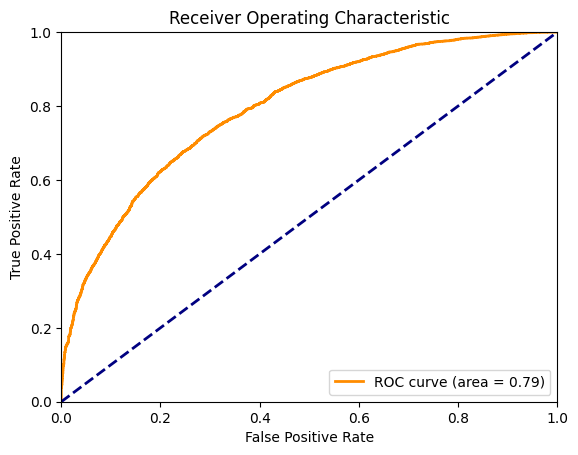

In [ ]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))

fpr, tpr, _ = roc_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Train a LogisticRegression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the LogisticRegression model
y_pred_lr = lr_model.predict(X_val)
print("LogisticRegression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("LogisticRegression Classification Report:\n", classification_report(y_val, y_pred_lr))

fpr, tpr, _ = roc_curve(y_val, lr_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

KNN Accuracy: 0.8210478566568383
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      3389
         1.0       0.84      0.88      0.86      5429

    accuracy                           0.82      8818
   macro avg       0.81      0.80      0.81      8818
weighted avg       0.82      0.82      0.82      8818



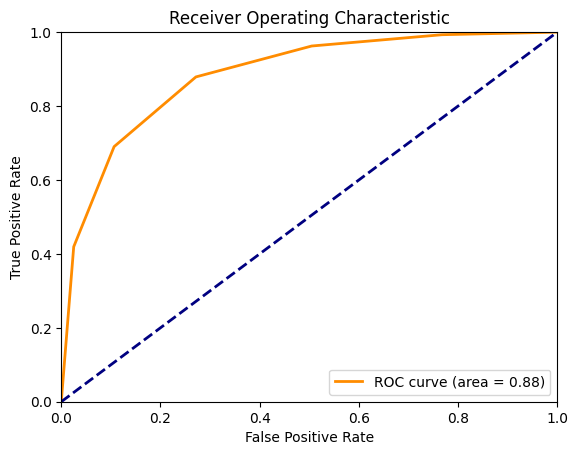

In [ ]:
# Train a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the K-Nearest Neighbors model
y_pred_knn = knn_model.predict(X_val)
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_val, y_pred_knn))

fpr, tpr, _ = roc_curve(y_val, knn_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Train a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the RandomForest model
y_pred_rf = rf_model.predict(X_val)
print("RandomForest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("RandomForest Classification Report:\n", classification_report(y_val, y_pred_rf))

## **Label: Arousal**

In [ ]:
labels = df_combine['Arousal_label'].values #change labels here
# Print the labels to verify
print(len(labels))

44090


Load Features

In [ ]:
def load_features_from_csv(file_path):
    X = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            # Convert the row to a list of floats
            features = list(map(float, row[:]))
            X.append(features)
    X = np.array(X)
    return X

file_path = '/content/drive/MyDrive/DEAP/savedfeatures.csv'  # Replace with your file path
X = load_features_from_csv(file_path)
y=labels
print("Features shape:", X.shape)
print("Labels shape:", y.shape)
'''
X = []
y = []

for frame_idx, frame_file in enumerate(frame_files):
    frame = cv2.imread(frame_file)
    sift_features = extract_sift_features(frame)
    if sift_features is not None:
        # Aggregate features by taking the mean (alternative aggregation methods can be used)
        aggregated_features = np.mean(sift_features, axis=0)
        X.append(aggregated_features)
        y.append(labels_s1[frame_idx % len(labels_s1)])
'''

X = np.array(X)
y = np.array(y)
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Ensure labels are single-class and categorical
# If they are in numeric format, this will work directly; otherwise, encode them
# For binary classification, make sure labels are 0 and 1.

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Features shape: (44090, 128)
Labels shape: (44090,)
Features shape: (44090, 128)
Labels shape: (44090,)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.766613744613291
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.57      0.63      3141
         1.0       0.79      0.88      0.83      5677

    accuracy                           0.77      8818
   macro avg       0.75      0.72      0.73      8818
weighted avg       0.76      0.77      0.76      8818



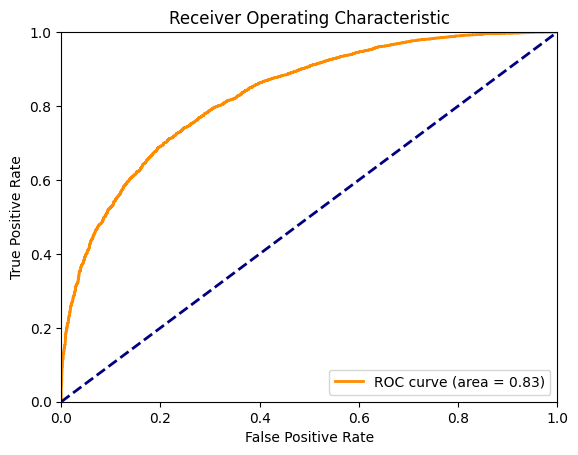

In [ ]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))

fpr, tpr, _ = roc_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.691540031753232
LogisticRegression Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.36      0.46      3141
         1.0       0.71      0.87      0.78      5677

    accuracy                           0.69      8818
   macro avg       0.66      0.62      0.62      8818
weighted avg       0.68      0.69      0.67      8818



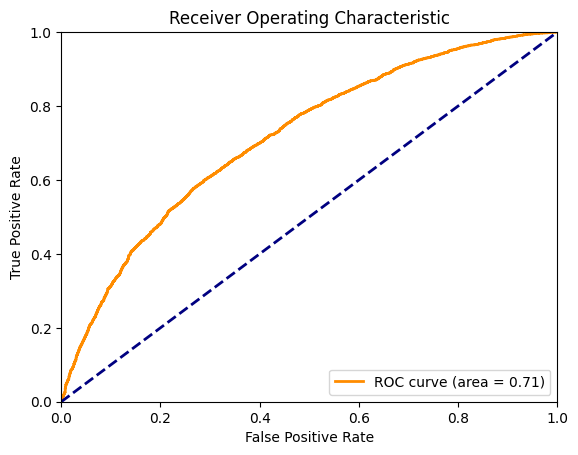

In [ ]:
# Train a LogisticRegression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the LogisticRegression model
y_pred_lr = lr_model.predict(X_val)
print("LogisticRegression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("LogisticRegression Classification Report:\n", classification_report(y_val, y_pred_lr))

fpr, tpr, _ = roc_curve(y_val, lr_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

KNN Accuracy: 0.8400997958720798
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      3141
         1.0       0.86      0.89      0.88      5677

    accuracy                           0.84      8818
   macro avg       0.83      0.82      0.82      8818
weighted avg       0.84      0.84      0.84      8818



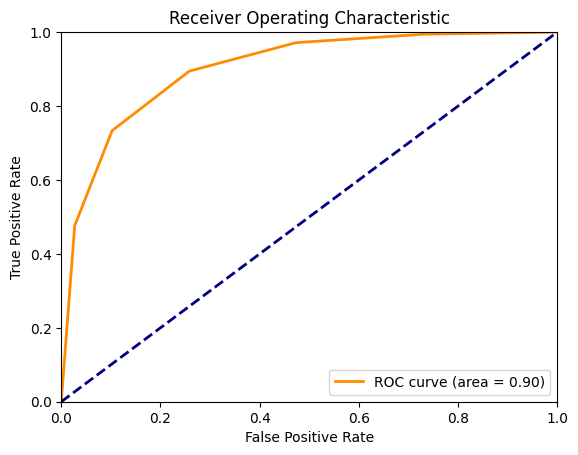

In [ ]:
# Train a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the K-Nearest Neighbors model
y_pred_knn = knn_model.predict(X_val)
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_val, y_pred_knn))

fpr, tpr, _ = roc_curve(y_val, knn_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Train a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the RandomForest model
y_pred_rf = rf_model.predict(X_val)
print("RandomForest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("RandomForest Classification Report:\n", classification_report(y_val, y_pred_rf))

## **Label: Dominance**

In [ ]:
labels = df_combine['Dominance_label'].values #change labels here
# Print the labels to verify
print(len(labels))

44090


Load Features

In [ ]:
def load_features_from_csv(file_path):
    X = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            # Convert the row to a list of floats
            features = list(map(float, row[:]))
            X.append(features)
    X = np.array(X)
    return X

file_path = '/content/drive/MyDrive/DEAP/savedfeatures.csv'  # Replace with your file path
X = load_features_from_csv(file_path)
y = labels
print("Features shape:", X.shape)
print("Labels shape:", y.shape)
'''
X = []
y = []

for frame_idx, frame_file in enumerate(frame_files):
    frame = cv2.imread(frame_file)
    sift_features = extract_sift_features(frame)
    if sift_features is not None:
        # Aggregate features by taking the mean (alternative aggregation methods can be used)
        aggregated_features = np.mean(sift_features, axis=0)
        X.append(aggregated_features)
        y.append(labels_s1[frame_idx % len(labels_s1)])
'''

X = np.array(X)
y = np.array(y)
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Ensure labels are single-class and categorical
# If they are in numeric format, this will work directly; otherwise, encode them
# For binary classification, make sure labels are 0 and 1.

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Features shape: (44090, 128)
Labels shape: (44090,)
Features shape: (44090, 128)
Labels shape: (44090,)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:27:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7367883873894308
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      0.59      0.63      3427
         1.0       0.76      0.83      0.79      5391

    accuracy                           0.74      8818
   macro avg       0.72      0.71      0.71      8818
weighted avg       0.73      0.74      0.73      8818



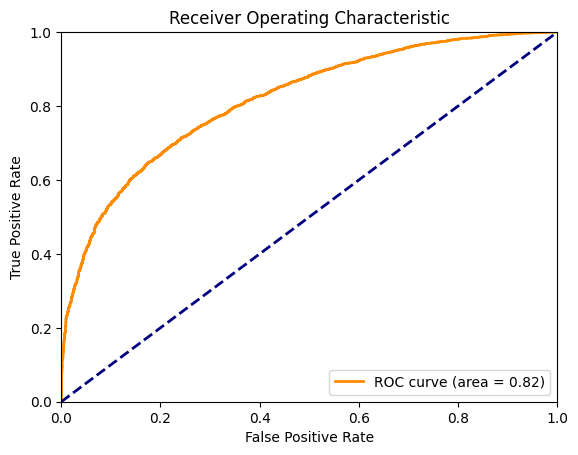

In [ ]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))

fpr, tpr, _ = roc_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.6485597641188479
LogisticRegression Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.35      0.44      3427
         1.0       0.67      0.84      0.74      5391

    accuracy                           0.65      8818
   macro avg       0.62      0.59      0.59      8818
weighted avg       0.63      0.65      0.63      8818



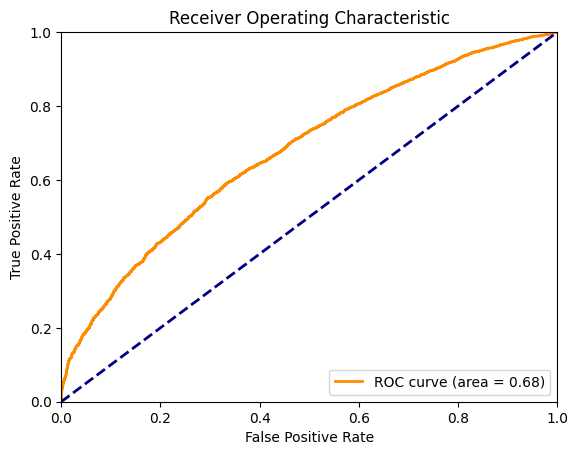

In [ ]:
# Train a LogisticRegression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the LogisticRegression model
y_pred_lr = lr_model.predict(X_val)
print("LogisticRegression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("LogisticRegression Classification Report:\n", classification_report(y_val, y_pred_lr))

fpr, tpr, _ = roc_curve(y_val, lr_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

KNN Accuracy: 0.8227489226581991
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      3427
         1.0       0.84      0.88      0.86      5391

    accuracy                           0.82      8818
   macro avg       0.82      0.81      0.81      8818
weighted avg       0.82      0.82      0.82      8818



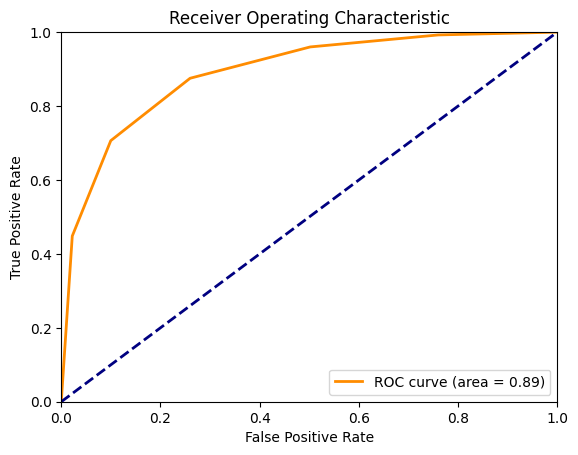

In [ ]:
# Train a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the K-Nearest Neighbors model
y_pred_knn = knn_model.predict(X_val)
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_val, y_pred_knn))

fpr, tpr, _ = roc_curve(y_val, knn_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Train a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the RandomForest model
y_pred_rf = rf_model.predict(X_val)
print("RandomForest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("RandomForest Classification Report:\n", classification_report(y_val, y_pred_rf))

## **Label: Liking**

In [ ]:
labels = df_combine['Liking_label'].values #change labels here
# Print the labels to verify
print(len(labels))

44090


Load Features

In [ ]:
def load_features_from_csv(file_path):
    X = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            # Convert the row to a list of floats
            features = list(map(float, row[:]))
            X.append(features)
    X = np.array(X)
    return X

file_path = '/content/drive/MyDrive/DEAP/savedfeatures.csv'  # Replace with your file path
X = load_features_from_csv(file_path)
y = labels
print("Features shape:", X.shape)
print("Labels shape:", y.shape)
'''
X = []
y = []

for frame_idx, frame_file in enumerate(frame_files):
    frame = cv2.imread(frame_file)
    sift_features = extract_sift_features(frame)
    if sift_features is not None:
        # Aggregate features by taking the mean (alternative aggregation methods can be used)
        aggregated_features = np.mean(sift_features, axis=0)
        X.append(aggregated_features)
        y.append(labels_s1[frame_idx % len(labels_s1)])
'''

X = np.array(X)
y = np.array(y)
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Ensure labels are single-class and categorical
# If they are in numeric format, this will work directly; otherwise, encode them
# For binary classification, make sure labels are 0 and 1.

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Features shape: (44090, 128)
Labels shape: (44090,)
Features shape: (44090, 128)
Labels shape: (44090,)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:32:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7753458834202767
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.41      0.52      2544
         1.0       0.79      0.92      0.85      6274

    accuracy                           0.78      8818
   macro avg       0.74      0.67      0.68      8818
weighted avg       0.76      0.78      0.76      8818



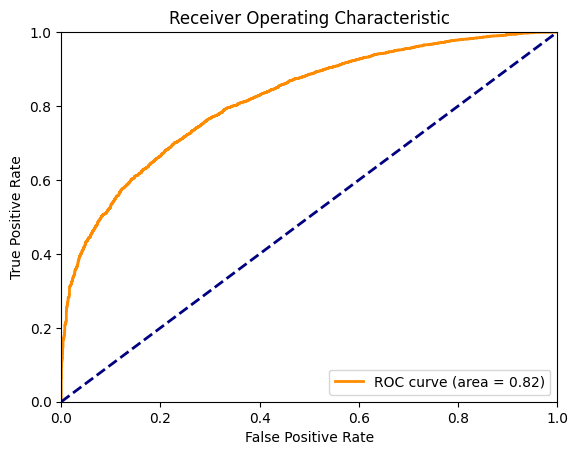

In [ ]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))

fpr, tpr, _ = roc_curve(y_val, xgb_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.7137672941710138
LogisticRegression Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.13      0.20      2544
         1.0       0.73      0.95      0.83      6274

    accuracy                           0.71      8818
   macro avg       0.62      0.54      0.52      8818
weighted avg       0.67      0.71      0.65      8818



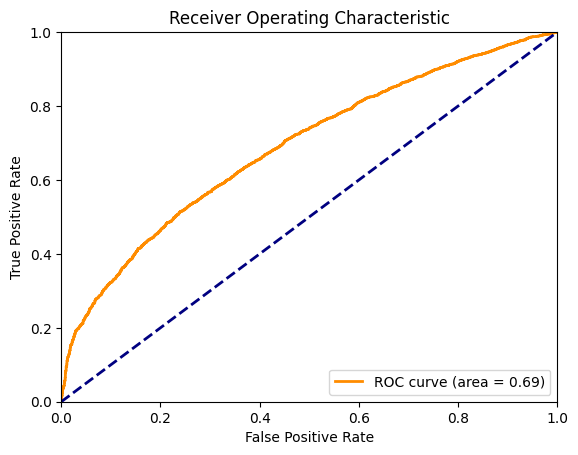

In [ ]:
# Train a LogisticRegression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the LogisticRegression model
y_pred_lr = lr_model.predict(X_val)
print("LogisticRegression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("LogisticRegression Classification Report:\n", classification_report(y_val, y_pred_lr))

fpr, tpr, _ = roc_curve(y_val, lr_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

KNN Accuracy: 0.8405534134724427
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.65      0.70      2544
         1.0       0.87      0.92      0.89      6274

    accuracy                           0.84      8818
   macro avg       0.81      0.78      0.80      8818
weighted avg       0.84      0.84      0.84      8818



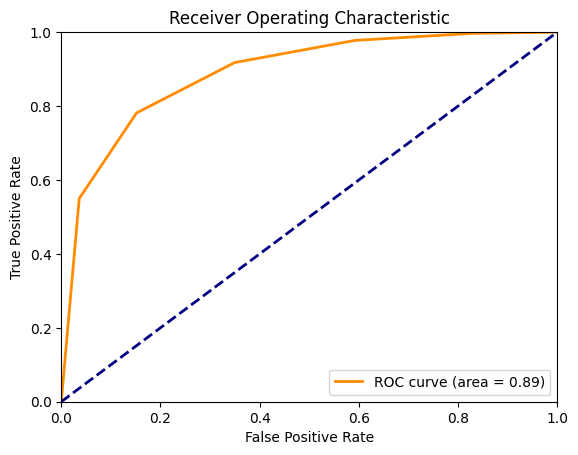

In [ ]:
# Train a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the K-Nearest Neighbors model
y_pred_knn = knn_model.predict(X_val)
print("KNN Accuracy:", accuracy_score(y_val, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_val, y_pred_knn))

fpr, tpr, _ = roc_curve(y_val, knn_model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Train a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the RandomForest model
y_pred_rf = rf_model.predict(X_val)
print("RandomForest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("RandomForest Classification Report:\n", classification_report(y_val, y_pred_rf))